<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.746720,38.874248,-0.028725,144.592242,144.625514,-0.033272
1,0.0,1.0,22.084793,52.315409,0.036416,84.436618,84.437658,-0.001040
2,0.0,2.0,67.300193,86.008222,-0.112867,163.195547,163.285910,-0.090363
3,0.0,3.0,62.788603,56.843058,-0.023063,129.608598,129.639599,-0.031001
4,0.0,4.0,83.186588,31.275356,-0.183351,124.278593,124.481479,-0.202885
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.517981,76.261707,-0.049801,109.729887,109.782774,-0.052888
59996,999.0,56.0,59.490452,61.363275,0.007589,130.861317,130.869153,-0.007836
59997,999.0,57.0,25.366995,43.449935,-0.071103,78.745828,78.795853,-0.050025
59998,999.0,58.0,74.694476,20.616130,0.051272,105.361878,105.304588,0.057290


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.746720,38.874248,-0.028725,144.592242,144.625514,-0.033272
1,0.0,1.0,22.084793,52.315409,0.036416,84.436618,84.437658,-0.001040
2,0.0,2.0,67.300193,86.008222,-0.112867,163.195547,163.285910,-0.090363
3,0.0,3.0,62.788603,56.843058,-0.023063,129.608598,129.639599,-0.031001
4,0.0,4.0,83.186588,31.275356,-0.183351,124.278593,124.481479,-0.202885
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.517981,76.261707,-0.049801,109.729887,109.782774,-0.052888
59996,999.0,56.0,59.490452,61.363275,0.007589,130.861317,130.869153,-0.007836
59997,999.0,57.0,25.366995,43.449935,-0.071103,78.745828,78.795853,-0.050025
59998,999.0,58.0,74.694476,20.616130,0.051272,105.361878,105.304588,0.057290


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.746720  38.874248 -0.028725  144.592242  144.625514 -0.033272
      1.0    22.084793  52.315409  0.036416   84.436618   84.437658 -0.001040
      2.0    67.300193  86.008222 -0.112867  163.195547  163.285910 -0.090363
      3.0    62.788603  56.843058 -0.023063  129.608598  129.639599 -0.031001
      4.0    83.186588  31.275356 -0.183351  124.278593  124.481479 -0.202885
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.517981  76.261707 -0.049801  109.729887  109.782774 -0.052888
      56.0   59.490452  61.363275  0.007589  130.861317  130.869153 -0.007836
      57.0   25.366995  43.449935 -0.071103   78.745828   78.795853 -0.050025
      58.0   74.694476  20.616130  0.051272  105.361878  105.304588  0.057290
      59.0   49.252894  88.837812  0.061997  148.152703  148.120599  0.032104

[60000 rows x 6 columns]

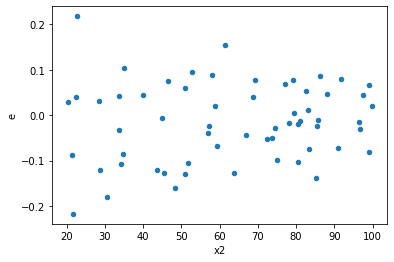

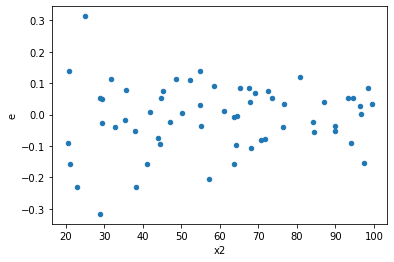

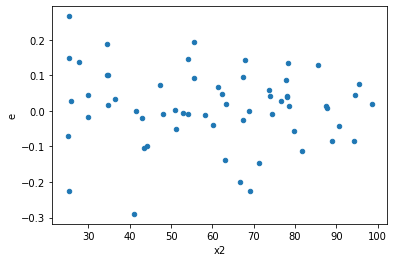

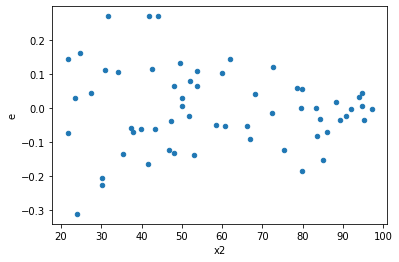

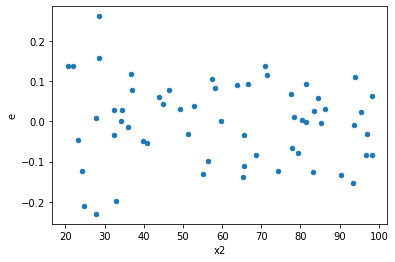

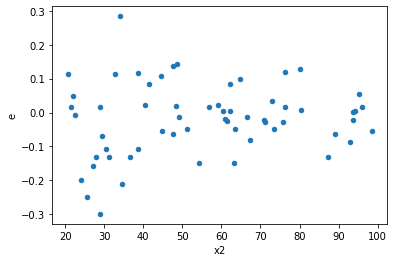

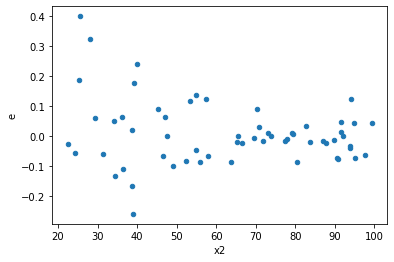

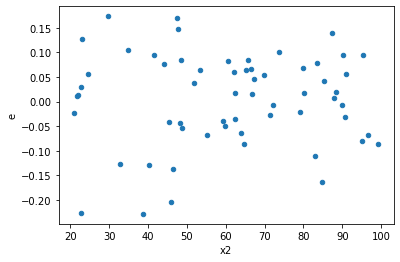

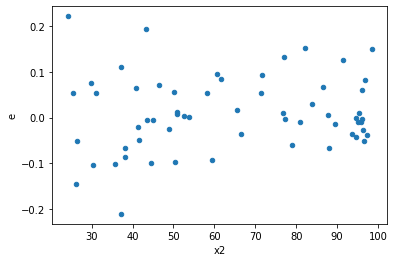

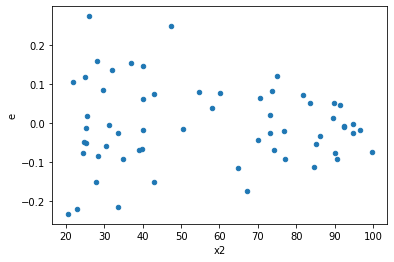

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,25.0,31.0,0.1947871902817392,0.4571441794279583,0.007791487611269568,0.014746586433159946,1.8926535173887153,0.09259445158356328,0.9537027742082184,0.04629722579178164,Reject005=1 : Homoscedasticity
1.0,35.0,21.0,0.2389062949426227,0.146556497614574,0.006825894141217791,0.006978880838789238,1.0224126970630332,0.9812456547544093,0.5093771726227954,0.49062282737720464,Reject005=1 : Homoscedasticity
5.0,19.0,37.0,0.14885363208096106,0.3896673660336725,0.007834401688471635,0.010531550433342501,1.3442699075335562,0.4308038459698995,0.7845980770150502,0.21540192298494976,Reject005=1 : Homoscedasticity
7.0,28.0,28.0,0.11097715483510337,0.2670150737735491,0.003963469815539406,0.00953625263476961,2.406036397043125,0.023381384019012907,0.9883093079904935,0.011690692009506454,Reject005=0 : Heteroscedasticity
11.0,26.0,30.0,0.14704923515710722,0.5194427163801811,0.005655739813734893,0.017314757212672706,3.061448684507027,0.003720375879792348,0.9981398120601038,0.001860187939896174,Reject005=0 : Heteroscedasticity
13.0,23.0,33.0,0.12856250052882265,0.6751740603392724,0.005589673936035767,0.02045982001028098,3.6602886401619372,0.0007110510976116036,0.9996444744511942,0.0003555255488058018,Reject005=0 : Heteroscedasticity
14.0,30.0,26.0,0.18083653236151492,0.3817378222920861,0.006027884412050498,0.014682223934311003,2.4357175636877497,0.02381426297235345,0.9880928685138233,0.011907131486176725,Reject005=0 : Heteroscedasticity
16.0,30.0,26.0,0.07207907154529383,0.5625191659961944,0.002402635718176461,0.02163535253831517,9.004840964711807,2.2543998468016468e-07,0.9999998872800077,1.1271999234008234e-07,Reject005=0 : Heteroscedasticity
18.0,26.0,30.0,0.10423981621630958,0.25872810014026404,0.0040092237006272916,0.008624270004675468,2.1511072089407475,0.044785689214047464,0.9776071553929763,0.022392844607023732,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,25.0,31.0,0.1947871902817392,0.4571441794279583,0.007791487611269568,0.014746586433159946,1.8926535173887153,0.09259445158356328,Reject005=1 : Homoscedasticity
1.0,35.0,21.0,0.2389062949426227,0.146556497614574,0.006825894141217791,0.006978880838789238,1.0224126970630332,0.9812456547544093,Reject005=1 : Homoscedasticity
2.0,33.0,23.0,0.33912948188822767,0.1613582514143872,0.01027665096630993,0.007015576148451617,0.6826714433963814,0.30958644226189314,Reject005=1 : Homoscedasticity
3.0,23.0,33.0,0.15470407539235106,0.21742736139470478,0.006726264147493524,0.00658870792105166,0.97954938678804,0.9758382228101626,Reject005=1 : Homoscedasticity
4.0,35.0,21.0,0.5177617401331724,0.13093544557729825,0.014793192575233498,0.0062350212179665835,0.421479081425949,0.02306002527492457,Reject005=0 : Heteroscedasticity
5.0,19.0,37.0,0.14885363208096106,0.3896673660336725,0.007834401688471635,0.010531550433342501,1.3442699075335562,0.4308038459698995,Reject005=1 : Homoscedasticity
6.0,22.0,34.0,0.4934678144175048,0.23864975985352124,0.022430355200795674,0.007019110583927095,0.31292908743942255,0.005678385975807989,Reject005=0 : Heteroscedasticity
7.0,28.0,28.0,0.11097715483510337,0.2670150737735491,0.003963469815539406,0.00953625263476961,2.406036397043125,0.023381384019012907,Reject005=0 : Heteroscedasticity
8.0,29.0,27.0,0.6445573318235418,0.13459043513310395,0.02222611489046696,0.0049848309308557015,0.22427810507691356,0.00015008480680298305,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      571
Reject005=0 : Heteroscedasticity    429
Name: Result_test, dtype: int64